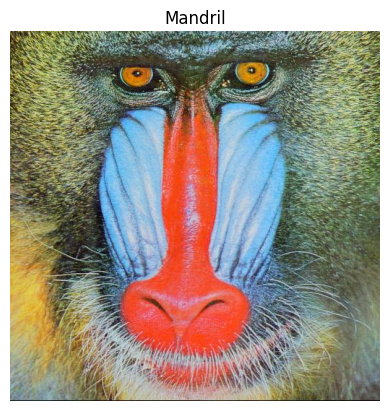

In [2]:
import matplotlib.pyplot as plt
I = plt.imread('mandril.jpg')

plt.figure(1)
plt.imshow(I)
plt.title('Mandril')
plt.axis('off')
plt.show()

In [3]:
plt.imsave('mandril.png', I)

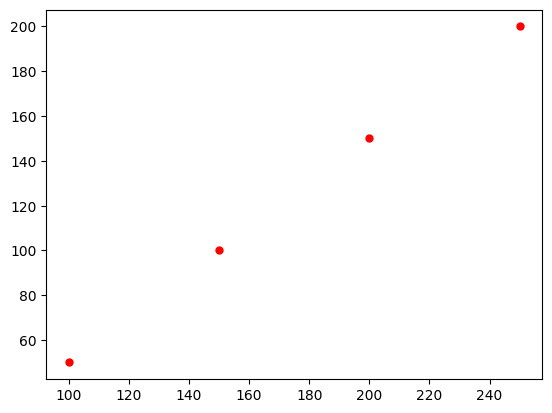

In [4]:
x = [ 100, 150, 200, 250]
y = [ 50, 100, 150, 200]
plt.plot(x, y, 'r.', markersize=10)

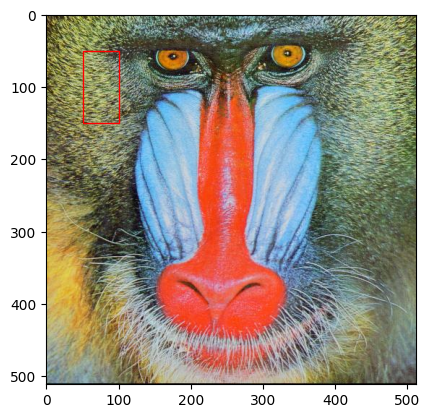

In [5]:
from matplotlib.patches import Rectangle


fix, ax = plt.subplots()
ax.imshow(I)
rect = Rectangle((50, 50), 50, 100, fill=False, ec='r')
ax.add_patch(rect)
plt.show()

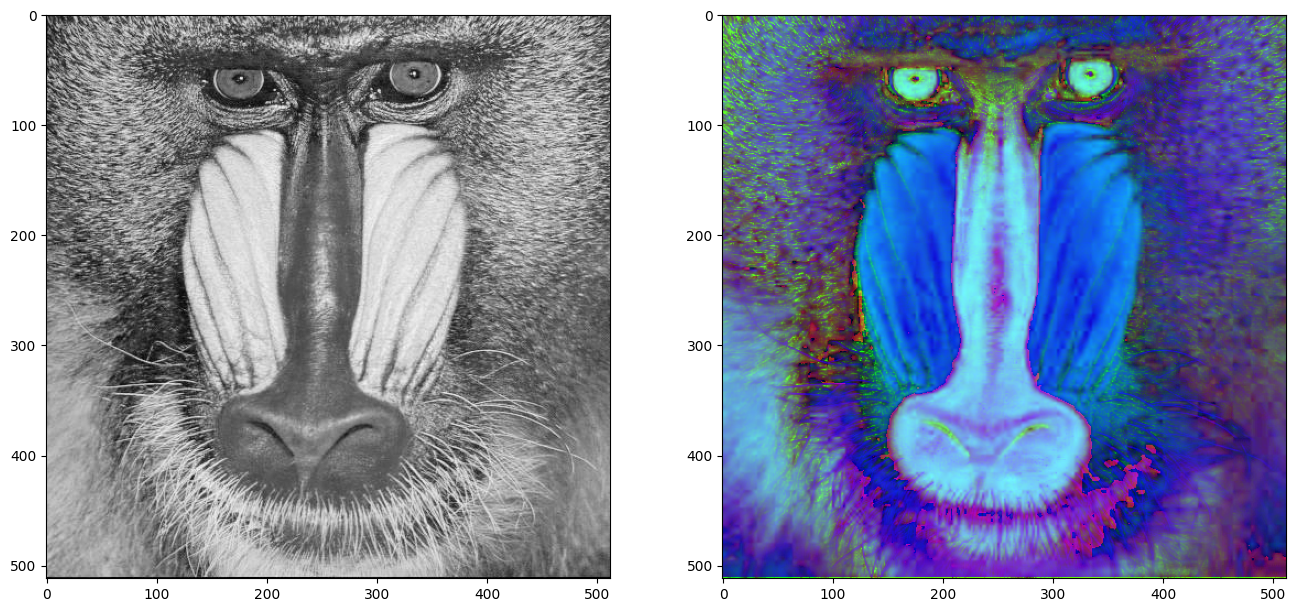

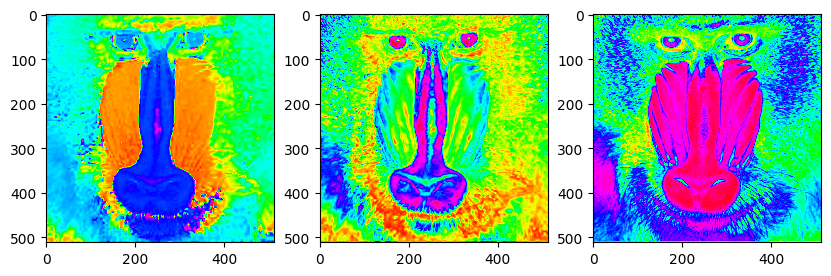

In [6]:
import cv2
IG = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)
IHSV = cv2.cvtColor(I, cv2.COLOR_BGR2HSV)

fix, ax = plt.subplots(1, 2, figsize=(16, 16))
ax[0].imshow(IG, 'gray')
ax[1].imshow(IHSV, 'hsv')
plt.show()


IH = IHSV[:,:,0]
IS = IHSV[:,:,1]
IV = IHSV[:,:,2]
f, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(IH, 'hsv')
ax[1].imshow(IS, 'hsv')
ax[2].imshow(IV, 'hsv')
plt.show()

In [7]:
def rgb2gray(I):
    return 0.299*I[:,:,0] + 0.587*I[:,:,1] + 0.114*I[:,:,2]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


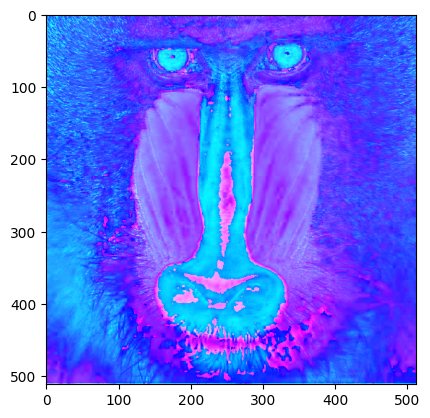

In [8]:
import matplotlib # add at the top of the file
_HSV = matplotlib.colors.rgb_to_hsv(I)
plt.hsv()
plt.imshow(_HSV)

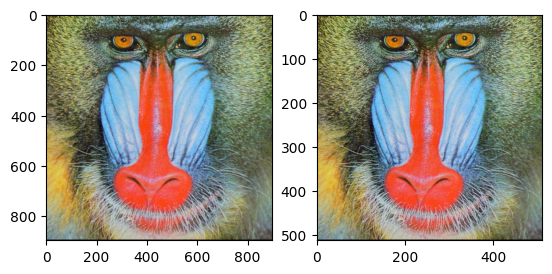

In [13]:
height, width = I.shape[:2] # retrieving elements 1 and 2, i.e. the
# corresponding height and width
scale = 1.75 # scale factor
Ix2 = cv2.resize(I,(int(scale*height),int(scale*width)))
# cv2.imshow("Big Mandrill",Ix2)
f, ax = plt.subplots(1, 2)
ax[0].imshow(Ix2)
ax[1].imshow(I)
plt.show()

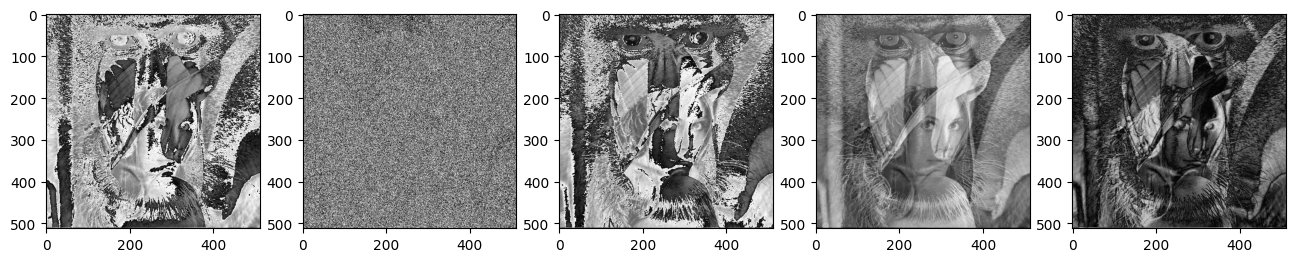

In [14]:
import numpy as np

lena = cv2.imread('lena.png')
lenaGray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
added = lenaGray + IG
mult = lenaGray * IG
subs = lenaGray - IG

alfa = 0.5
linearComb = (1 - alfa) * lenaGray + alfa * IG
abd = cv2.absdiff(lenaGray, IG)
f, ax = plt.subplots(1, 5, figsize=(16, 10))
plt.gray()
ax[0].imshow(np.uint8(added) )
ax[1].imshow(np.uint8(mult) )
ax[2].imshow(np.uint8(subs))
ax[3].imshow(np.uint8(linearComb) )
ax[4].imshow(np.uint8(abd) )
plt.show()

In [ ]:
def hist(img):
    h = np.zeros((256, 1), np.float32)
    height, width = img.shape[:2]
    for y in range(height):
        for x in range(width):
            h[img[y, x]] += 1

    return h

hist1 = cv2.calcHist([IG],[0],None,[256],[0,256])
hist2 = hist(IG)
# print(hist1)
# print(hist2)

[]

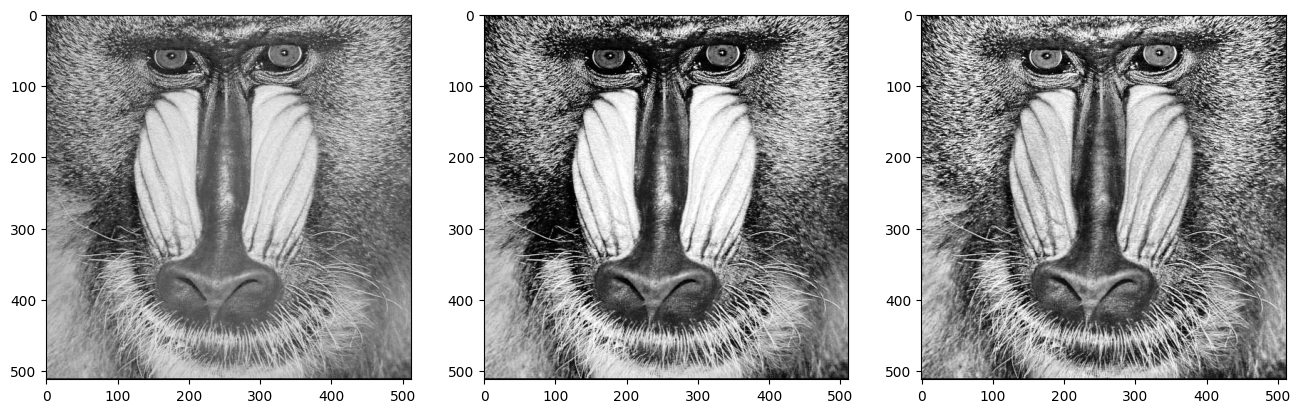

In [21]:
IGE = cv2.equalizeHist(IG)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
I_CLAHE = clahe.apply(IG)

f, ax = plt.subplots(1, 3, figsize=(16, 10))
plt.gray()
ax[0].imshow(IG)
ax[1].imshow(IGE)
ax[2].imshow(I_CLAHE)
plt.plot()

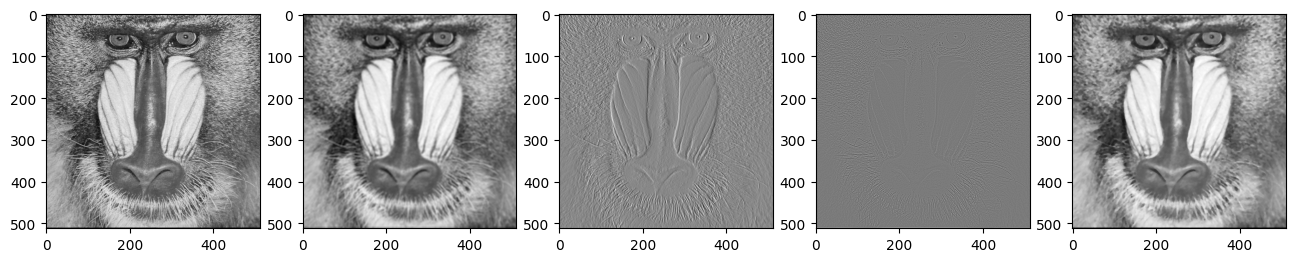

In [24]:
f, ax = plt.subplots(1, 5, figsize=(16, 16))
ax[0].imshow(IG)
ax[1].imshow(cv2.GaussianBlur(IG, (5, 5), 10))
ax[2].imshow(cv2.Sobel(IG, cv2.CV_64F, 1, 0, 3))
ax[3].imshow(cv2.Laplacian(IG, cv2.CV_64F, 3))
ax[4].imshow(cv2.medianBlur(IG, 5))
plt.plot()





[]

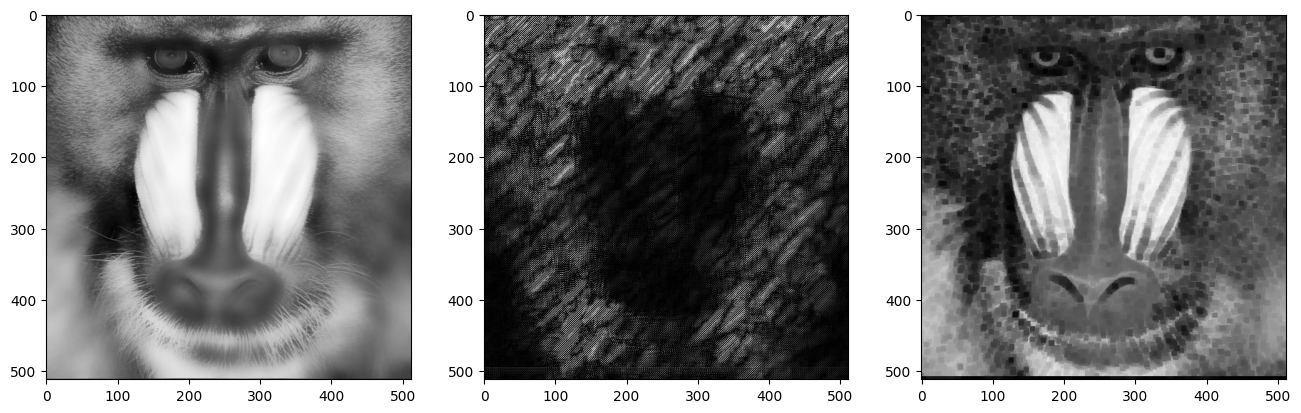

In [34]:


ksize = 32
# sigma for Gaussian envelope 
sigma = 5  
# range of orientation values 
theta = np.pi / 4
# frequency of sinusoidal wave 
frequency = 0.3  
# phase of sinusoidal wave 
phase = 0  

kernel = cv2.getGaborKernel((ksize, ksize), 
                                sigma, theta, 
                                frequency, phase) 
    
f, ax = plt.subplots(1, 3, figsize=(16, 16))
ax[0].imshow(cv2.bilateralFilter(IG, 27, 75, 75))
ax[1].imshow(cv2.filter2D(IG, -1, kernel))
ax[2].imshow(cv2.erode(IG, np.ones((7, 7))))
plt.plot()
